In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Veri Yükleme && import data

veri = pd.read_csv('veri-seti.txt', delimiter='\t', names=[
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
])


In [3]:
veri.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# veri hakkında bilgi && data information
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Eğitim ve Test Setlerine Ayırma && Separation into Training and Test Sets
X = veri.drop('Outcome', axis=1)
y = veri['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Veriyi Ölçekleme && Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Confusion Matrix ve ROC Curve Gösterimi
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



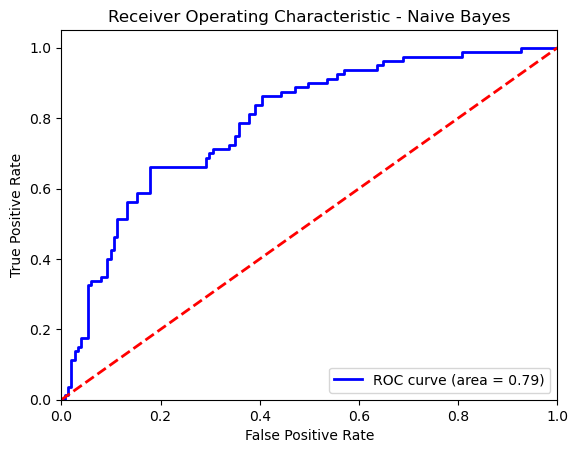

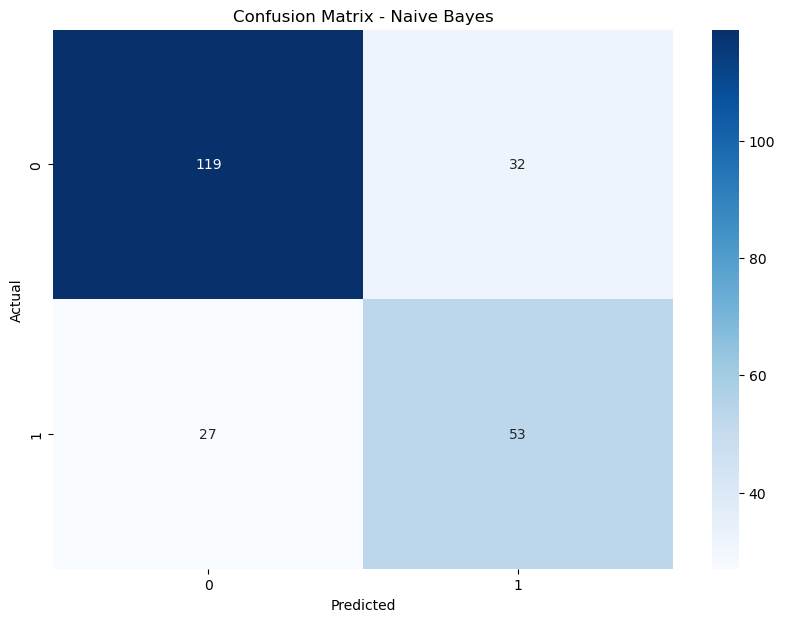

In [10]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
y_pred_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Naive Bayes ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_nb))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.77       151
           1       0.53      0.24      0.33        80

    accuracy                           0.66       231
   macro avg       0.61      0.56      0.55       231
weighted avg       0.63      0.66      0.62       231



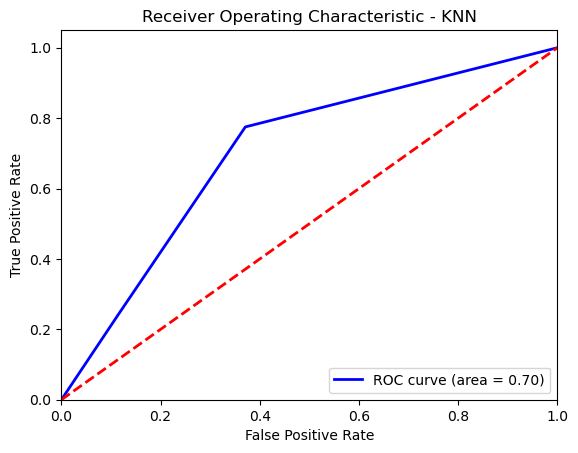

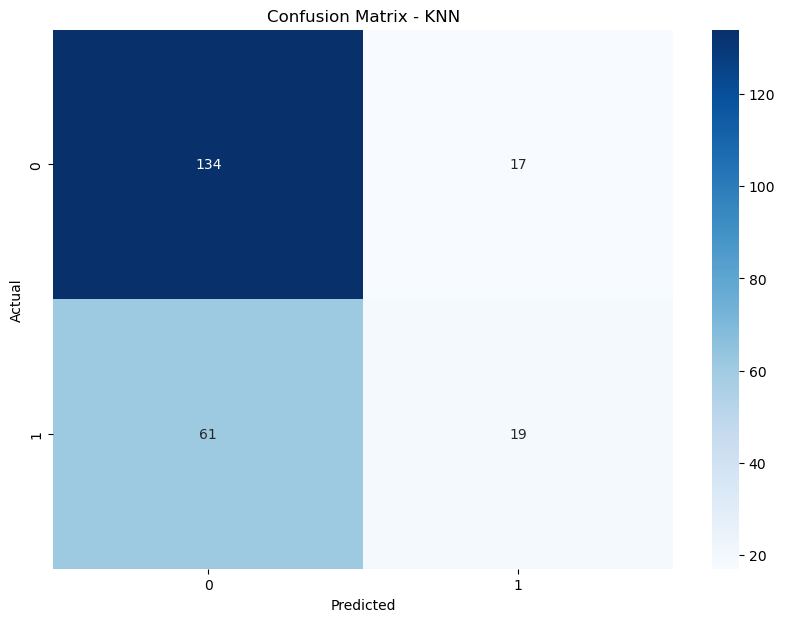

In [17]:

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# KNN ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_knn))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

# KNN Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Multi-Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(accuracy_mlp)
print("MLP siniflandirmasi raporu:\n", classification_report(y_test, y_pred_mlp))

0.7142857142857143
MLP siniflandirmasi raporu:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       151
           1       0.59      0.59      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



c:\Users\muhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


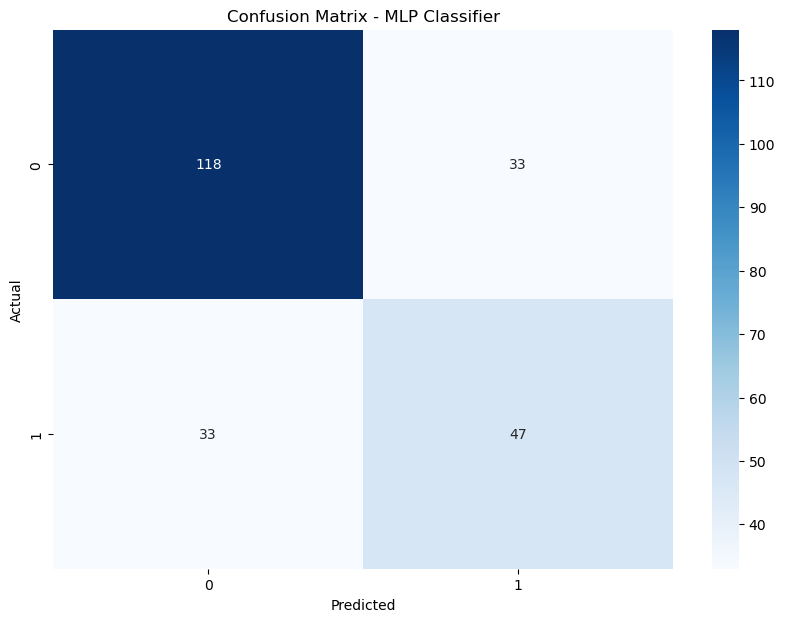

In [19]:
# Confusion Matrix'i Görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# Multi-Layer Perceptron 2
mlp = MLPClassifier(hidden_layer_sizes=(500,2), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(accuracy_mlp)
print("MLP siniflandirmasi raporu:\n", classification_report(y_test, y_pred_mlp))

0.7402597402597403
MLP siniflandirmasi raporu:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



c:\Users\muhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Multi-Layer Perceptron 3
mlp = MLPClassifier(hidden_layer_sizes=(64,32,2), max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(accuracy_mlp)
print("MLP siniflandirmasi raporu:\n", classification_report(y_test, y_pred_mlp))

0.7575757575757576
MLP siniflandirmasi raporu:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       151
           1       0.65      0.64      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



c:\Users\muhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# Multi-Layer Perceptron 4
mlp = MLPClassifier(hidden_layer_sizes=(128,128,2), max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(accuracy_mlp)
print("MLP siniflandirmasi raporu:\n", classification_report(y_test, y_pred_mlp))

0.7532467532467533
MLP siniflandirmasi raporu:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       151
           1       0.63      0.70      0.66        80

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.76       231



c:\Users\muhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


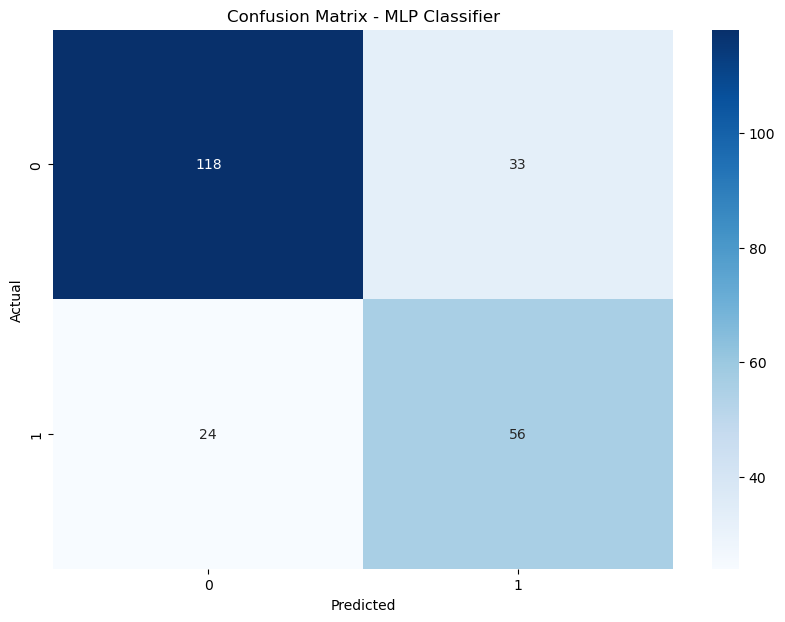

In [23]:
# Confusion Matrix'i Görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()